In [1]:
import os
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
RESULTS_PATH = "results"
df = None

for path in os.listdir(RESULTS_PATH):
    if "optuna" in path or "results_in_depth" in path:
        continue
    tmp = pd.read_csv(os.path.join(RESULTS_PATH, path))
    if "type" in tmp.columns:
        tmp["dataset"] = tmp["type"]
        tmp = tmp.drop("type", axis=1)
    df = tmp if df is None else pd.concat([df, tmp])
df.reset_index(inplace=True, drop=True)

df_grouped = None
for path in os.listdir(RESULTS_PATH):
    if not "results_in_depth" in path:
        continue
    tmp = pd.read_csv(os.path.join(RESULTS_PATH, path), index_col=0)
    df_grouped = tmp if df_grouped is None else pd.concat([df_grouped, tmp])
df_grouped.reset_index(inplace=True, drop=True)

In [3]:
model_mapping = {
    "xlm-roberta-base-full-training": "transformers",
    "gpt2-full-training": "transformers",
    "distilbert-base-uncased-full-training-gpt2-data-with-twitter": "transformers",
    "distilbert-base-uncased-full-training": "transformers",
    "xlm-roberta-base-full-training-2": "transformers",
    "xlm-roberta-base-finetuned": "transformers",
}
df["model_short"] = df["model"].apply(
    lambda x: model_mapping[x] if x in model_mapping else x
)

In [4]:
print("Shape: ", df.shape)
df.head()

Shape:  (44, 7)


,balanced_accuracy,f1_score,precision,recall,model,dataset,model_short
0,0.781096,0.776358,0.794118,0.759375,xlm-roberta-base-finetuned,raw,transformers
1,0.871338,0.878553,0.832750,0.929688,xlm-roberta-base-full-training,raw,transformers
2,0.883512,0.882120,0.893429,0.871094,xlm-roberta-base-full-training-2,raw,transformers
3,0.869828,0.868639,0.877291,0.860156,distilbert-base-uncased-full-training,raw,transformers
4,0.855369,0.852941,0.868123,0.838281,distilbert-base-uncased-full-training-gpt2-dat...,raw,transformers


In [5]:
_mapper = {
    "lemmatization": "lemmatized",
    "stemming": "stemmed",
    "preprocessed": "simple",
}
df["dataset"] = df["dataset"].apply(lambda x: _mapper[x] if x in _mapper else x)

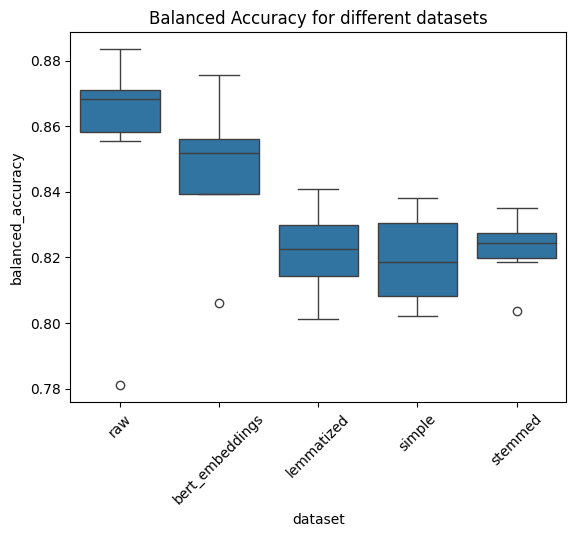

In [6]:
ax = plt.gca()
sns.boxplot(x="dataset", y="balanced_accuracy", data=df)
ax.set_title("Balanced Accuracy for different datasets")
# rotate x axis labels
for item in ax.get_xticklabels():
    item.set_rotation(45)
plt.savefig('./images/ba_per_dataset.png', bbox_inches="tight")

In [7]:
models_order = [
    "RF",
    "LR",
    "SVC",
    "LGBM",
    "XGB",
    "WordGRU",
    "WordCNN",
    "WordCNN+GRU",
    "CharGRU",
    "CharCNN",
    "CharCNN+GRU",
    "transformers",
]

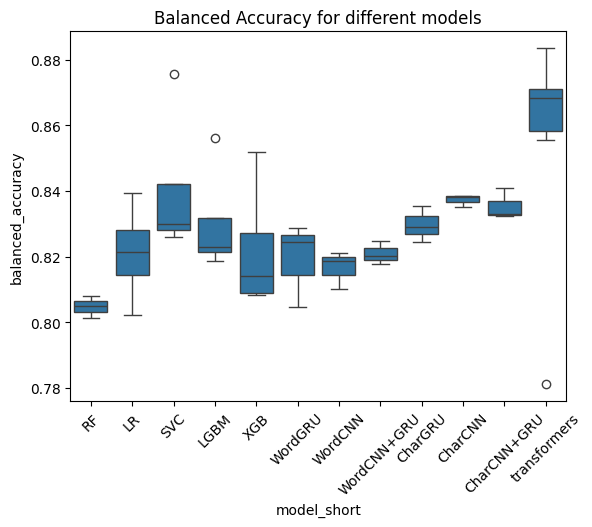

In [8]:
ax = plt.gca()
sns.boxplot(x="model_short", y="balanced_accuracy", data=df, order=models_order)
ax.set_title("Balanced Accuracy for different models")
# rotate x axis labels
for item in ax.get_xticklabels():
    item.set_rotation(45)
plt.savefig('./images/ba_per_model.png', bbox_inches="tight")


In [9]:
df.sort_values(by="balanced_accuracy", ascending=False).head(10)

,balanced_accuracy,f1_score,precision,recall,model,dataset,model_short
2,0.883512,0.882120,0.893429,0.871094,xlm-roberta-base-full-training-2,raw,transformers
6,0.875681,0.876265,0.872868,0.879687,SVC,bert_embeddings,SVC
1,0.871338,0.878553,0.832750,0.929688,xlm-roberta-base-full-training,raw,transformers
3,0.869828,0.868639,0.877291,0.860156,distilbert-base-uncased-full-training,raw,transformers
5,0.867075,0.868624,0.859327,0.878125,gpt2-full-training,raw,transformers
7,0.856122,0.859004,0.842857,0.875781,LGBM,bert_embeddings,LGBM
4,0.855369,0.852941,0.868123,0.838281,distilbert-base-uncased-full-training-gpt2-dat...,raw,transformers
8,0.851823,0.854622,0.839488,0.870313,XGB,bert_embeddings,XGB
39,0.840834,0.851838,0.797546,0.914062,CharCNN+GRU,lemmatized,CharCNN+GRU
9,0.839317,0.841618,0.830418,0.853125,LR,bert_embeddings,LR


In [10]:
print("Shape: ", df_grouped.shape)
df_grouped.head()

Shape:  (220, 4)


,accuracy,model,bot_type,type
0,0.836463,LGBMClassifier,human,bert_embeddings
1,0.978155,LGBMClassifier,rnn,bert_embeddings
2,0.948347,LGBMClassifier,others,bert_embeddings
3,0.674479,LGBMClassifier,gpt2,bert_embeddings
4,0.856138,LGBMClassifier,all,bert_embeddings


In [11]:
model_mapping = {
    "LogisticRegression": "LR",
    "XGBClassifier": "XGB",
    "RandomForestClassifier": "RFC",
    "LGBMClassifier": "LGBM",
    "xlm-roberta-base-full-training": "XLM",
    "gpt2-full-training": "GPT2",
    "distilbert-base-uncased-full-training-gpt2-data-with-twitter": "DistilBERT-Finetuned",
    "distilbert-base-uncased-full-training": "DisitlBERT",
    "xlm-roberta-base-full-training-2": "XLM_lower_lr",
    "xlm-roberta-base-finetuned": "XLM_Finetuned",
}

In [12]:
df_grouped["model_name"] = df_grouped[["model", "type"]].apply(
    lambda x: model_mapping[x["model"]] + "_" + x["type"]
    if x["model"] in model_mapping
    else x["model"] + "_" + x["type"],
    axis=1,
)

In [13]:
# Define the desired order of the x-axis
x_axis_order = [
    "LGBM_tfidf stemmed",
    "LR_tfidf stemmed",
    "RFC_tfidf stemmed",
    "SVC_tfidf stemmed",
    "XGB_tfidf stemmed",
    "LGBM_tfidf lemmatized",
    "LR_tfidf lemmatized",
    "RFC_tfidf lemmatized",
    "SVC_tfidf lemmatized",
    "XGB_tfidf lemmatized",
    "LGBM_tfidf preprocessed",
    "LR_tfidf preprocessed",
    "RFC_tfidf preprocessed",
    "SVC_tfidf preprocessed",
    "XGB_tfidf preprocessed",
    "LGBM_bert_embeddings",
    "LR_bert_embeddings",
    "RFC_bert_embeddings",
    "SVC_bert_embeddings",
    "XGB_bert_embeddings",
    "CharCNN_lemmatized",
    "CharCNN_simple",
    "CharCNN_stemmed",
    "CharGRU_lemmatized",
    "CharGRU_simple",
    "CharGRU_stemmed",
    "CharCNN_GRU_lemmatized",
    "CharCNN_GRU_simple",
    "CharCNN_GRU_stemmed",
    "WordCNN_lemmatized",
    "WordCNN_simple",
    "WordCNN_stemmed",
    "WordGRU_lemmatized",
    "WordGRU_simple",
    "WordGRU_stemmed",
    "WordCNN_GRU_lemmatized",
    "WordCNN_GRU_simple",
    "WordCNN_GRU_stemmed",
    "XLM_Finetuned_raw",
    "XLM_raw",
    "XLM_lower_lr_raw",
    "DisitlBERT_raw",
    "DistilBERT-Finetuned_raw",
    "GPT2_raw",
]

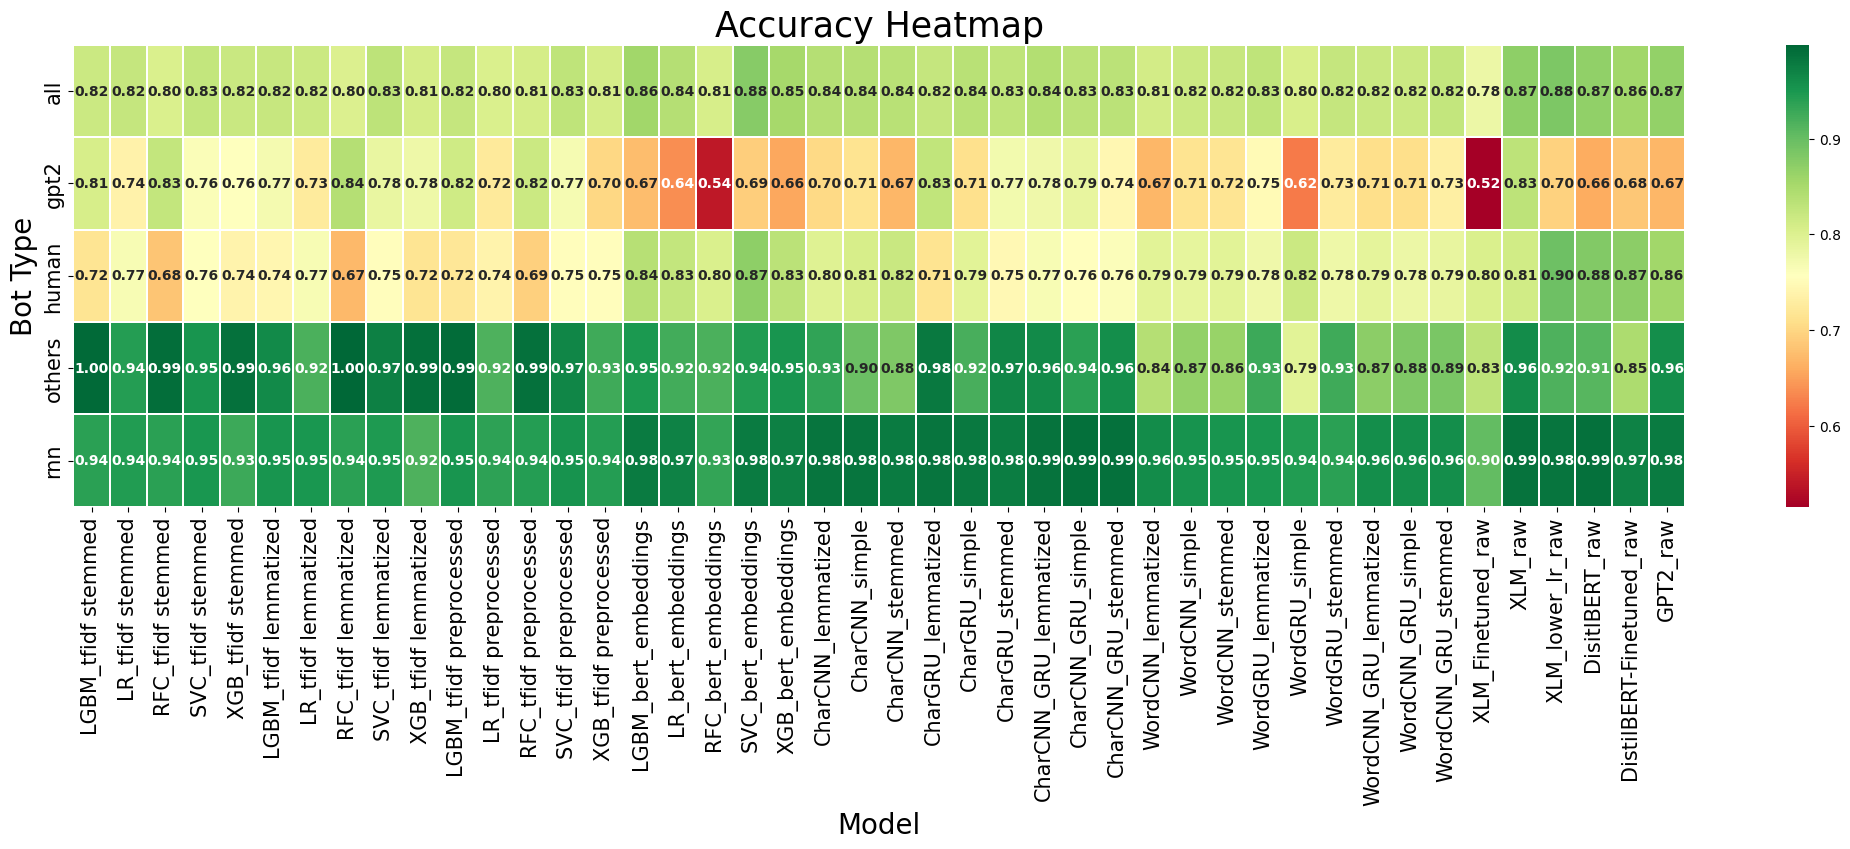

In [14]:
pivot_df = df_grouped.pivot(index="bot_type", columns="model_name", values="accuracy")
pivot_df = pivot_df[x_axis_order]
fig, ax = plt.subplots(figsize=(26, 6))
sns.heatmap(
    pivot_df,
    cmap="RdYlGn",
    annot=True,
    fmt=".2f",
    cbar=True,
    linewidths=0.3,
    ax=ax,
    annot_kws={"weight": "bold"},
)
ax.set_title("Accuracy Heatmap", fontsize=25)
ax.set_xlabel("Model", fontsize=20)
ax.set_ylabel("Bot Type", fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)
plt.savefig('./images/acc_heatmap.png', bbox_inches="tight")
plt.show()

In [15]:
pivot_grouped = df_grouped.pivot(
    index="model_name", columns="bot_type", values="accuracy"
)

In [16]:
pivot_grouped.sort_values(by="all", ascending=False).head(10)

bot_type,all,gpt2,human,others,rnn
model_name,,,,,
XLM_lower_lr_raw,0.883503,0.695312,0.895931,0.915289,0.983010
SVC_bert_embeddings,0.875684,0.692708,0.871674,0.944215,0.978155
XLM_raw,0.871384,0.830729,0.812989,0.960744,0.985437
DisitlBERT_raw,0.869820,0.658854,0.879499,0.911157,0.987864
GPT2_raw,0.867084,0.669271,0.856025,0.958678,0.978155
LGBM_bert_embeddings,0.856138,0.674479,0.836463,0.948347,0.978155
DistilBERT-Finetuned_raw,0.855356,0.684896,0.872457,0.847107,0.970874
XGB_bert_embeddings,0.851837,0.656250,0.833333,0.952479,0.973301
CharCNN_GRU_lemmatized,0.840891,0.776042,0.767606,0.962810,0.985437
